This notebook will walk you through how to normalize the colorbar for our SLA plots and video.

Start by importing libraries, loading in the dataset, and assigning variables.

In [4]:
from netCDF4 import Dataset #Tool we need to load in our nc dataset
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = Dataset('/Users/katyabbott/Documents/GitHub/BridgeUP-STEM-Oceans-Six/datasets/Bermuda_data_SLA.nc')  #Loading in our dataset

dataset.variables.keys()

odict_keys(['latitude', 'longitude', 'sla', 'time'])

In [7]:
times = dataset.variables['time'][:]
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]
sla = dataset.variables['sla'][:]

Text(0.5, 1.0, 'Sea level anomaly in Bermuda on day 0')

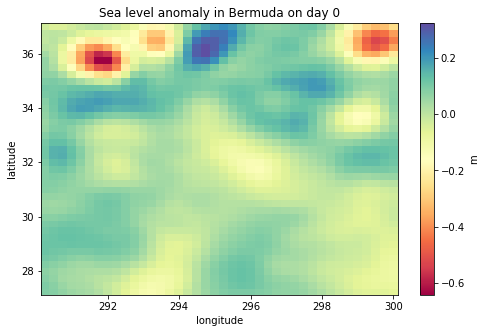

In [9]:
#Plot the data without normalizing the colorbar
day = 0
fig = plt.figure(figsize=(8,5))
graph = plt.pcolor(lon, lat, sla[day,:,:], cmap ='Spectral')
cb = plt.colorbar(graph)
cb.set_label('m')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Sea level anomaly in Bermuda on day {}'.format(day))

Text(0.5, 1.0, 'Sea level anomaly in Bermuda on day 0')

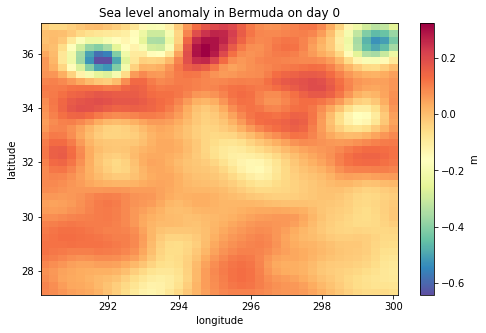

In [11]:
#Flip the colorbar by using 'Spectral_r' (for reverse) instead of 'Spectral'
fig = plt.figure(figsize=(8,5))
graph = plt.pcolor(lon, lat, sla[day,:,:], cmap ='Spectral_r')
cb = plt.colorbar(graph)
cb.set_label('m')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Sea level anomaly in Bermuda on day {}'.format(day))

We'll use Matplotlib's *normalize* function to create a fixed range of values for the colorbar. Learn more [here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.colors.Normalize.html). We will also have to `import matplotlib` (not just `matplotlib.pyplot`) to access this function.

In [13]:
import matplotlib

`matplotlib.colors.Normalize` takes in two values: the minimum value you want to use for your colorbar, and the maximum value. For every plot we make, these two values will be the endpoints of the plotted colorbar, even if they don't appear in the color map. 
To guarantee our normalized color bar works on all days, we'll create it using the minimum and maximum values of the `sla` array -- the minimum and maximum values for our entire dataset. 

In [14]:
#Creating the normalized colorbar.
normalize = matplotlib.colors.Normalize(vmin=sla.min(), vmax=sla.max())

Then we call it in the `pcolor` function with the argument `norm = normalize`

Text(0.5, 1.0, 'Sea level anomaly in Bermuda on day 4')

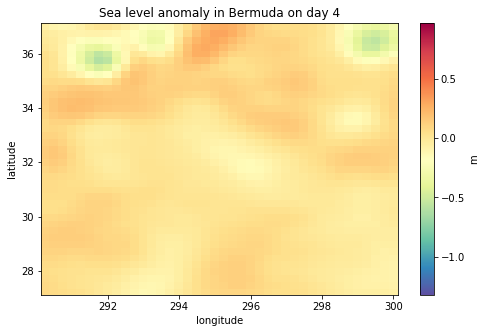

In [15]:
fig = plt.figure(figsize=(8,5))
graph = plt.pcolor(lon, lat, sla[day,:,:], cmap ='Spectral_r', norm = normalize)
cb = plt.colorbar(graph)
cb.set_label('m')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Sea level anomaly in Bermuda on day {}'.format(day))

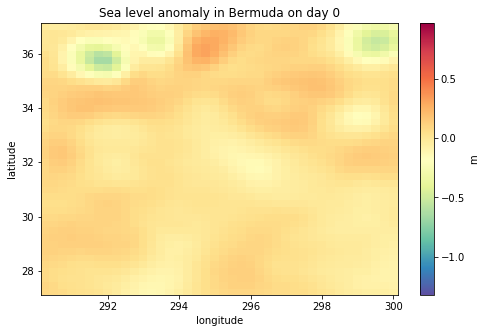

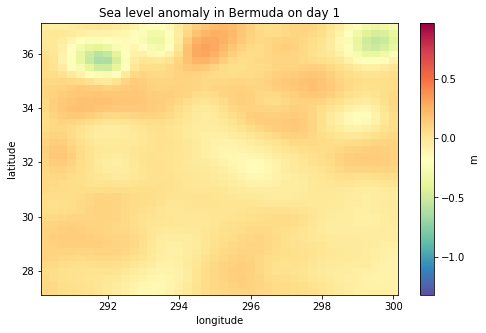

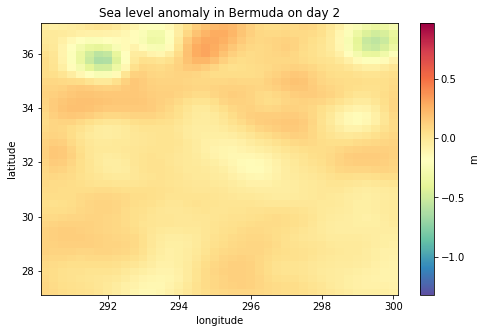

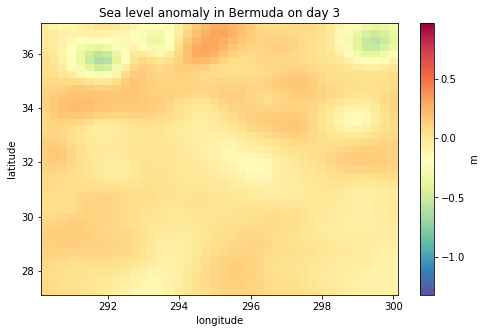

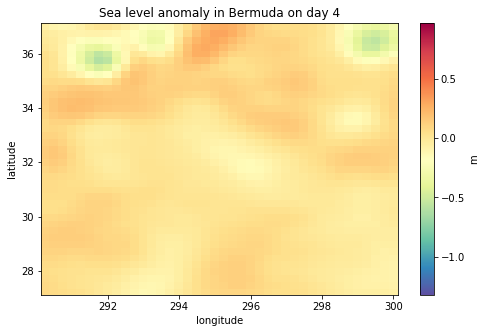

In [17]:
#Plotting over five days to see comparison
for day in range(5):#len(times)):
    fig = plt.figure(figsize=(8,5))
    graph = plt.pcolor(lon, lat, sla[day,:,:], cmap ='Spectral_r', norm = normalize)
    cb = plt.colorbar(graph)
    cb.set_label('m')
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('Sea level anomaly in Bermuda on day {}'.format(day))